## Understandung why people vote.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

voting_data = pd.read_csv('gerber.csv')

In [127]:
voting_data

,sex,yob,voting,hawthorne,civicduty,neighbors,self,control
0,0,1941,0,0,1,0,0,0
1,1,1947,0,0,1,0,0,0
2,1,1982,1,1,0,0,0,0
3,1,1950,1,1,0,0,0,0
4,0,1951,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
344079,1,1944,1,0,0,0,0,1
344080,1,1958,0,0,0,0,0,1
344081,0,1955,0,0,0,0,0,1
344082,1,1949,1,0,0,0,0,1


In [128]:
### missing values
voting_df = pd.DataFrame(voting_data)

In [129]:
voting_df.isnull().sum()

sex          0
yob          0
voting       0
hawthorne    0
civicduty    0
neighbors    0
self         0
control      0
dtype: int64

In [130]:
## how many people actually voted

In [131]:
voting_df['voting'].value_counts()

0    235388
1    108696
Name: voting, dtype: int64

In [132]:
count = voting_df.value_counts()
count

sex  yob   voting  hawthorne  civicduty  neighbors  self  control
1    1956  0       0          0          0          0     1          2169
     1961  0       0          0          0          0     1          2164
     1960  0       0          0          0          0     1          2158
     1959  0       0          0          0          0     1          2124
     1957  0       0          0          0          0     1          2088
                                                                     ... 
0    1916  1       1          0          0          0     0             1
1    1914  1       1          0          0          0     0             1
0    1915  1       0          0          0          1     0             1
     1912  1       0          0          0          1     0             1
     1900  0       0          0          0          0     1             1
Length: 1567, dtype: int64

In [133]:
count = voting_df.groupby(voting_df['hawthorne'])['voting'].value_counts()
count

hawthorne  voting
0          0         209500
           1          96380
1          0          25888
           1          12316
Name: voting, dtype: int64

In [134]:
count = voting_df.groupby(voting_df['civicduty'])['voting'].value_counts()
count

civicduty  voting
0          0         209191
           1          96675
1          0          26197
           1          12021
Name: voting, dtype: int64

In [135]:
count = voting_df.groupby(voting_df['neighbors'])['voting'].value_counts()
count

neighbors  voting
0          0         211625
           1          94258
1          0          23763
           1          14438
Name: voting, dtype: int64

In [136]:
count = voting_df.groupby(voting_df['self'])['voting'].value_counts()
count

self  voting
0     0         210361
      1          95505
1     0          25027
      1          13191
Name: voting, dtype: int64

In [137]:
for feature in voting_df.columns:
    count = voting_df.groupby(voting_df[feature])['voting'].value_counts()
    count

In [138]:
x = voting_df[['sex', 'hawthorne', 'civicduty', 'neighbors', 'self']]

In [139]:
x.shape

(344084, 5)

In [140]:
y = voting_df['voting']
y.shape

(344084,)

In [141]:
x.shape, y.shape

((344084, 5), (344084,))

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [143]:
model.coef_

array([[-0.05591181,  0.1204899 ,  0.08438966,  0.36516277,  0.22304065]])

In [144]:
model.predict(x)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
threshold = 0.3
pred = (model.predict_proba(x)[:,1] == threshold).astype(int)

In [146]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
model.score(x, y)

0.6841003940898153

In [148]:
## Using a threshold of 0.3, what is the accuracy of the logistic regression model

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

THRESHOLD = 0.3
preds = np.where(model.predict_proba(x)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y, preds), recall_score(y, preds),
                   precision_score(y, preds), roc_auc_score(y, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.432118
recall,0.745023
precision,0.325663
roc_auc_score,0.516325


In [149]:
## Using a threshold of 0.5, what is the accuracy of the logistic regression model

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

THRESHOLD = 0.5
preds = np.where(model.predict_proba(x)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y, preds), recall_score(y, preds),
                   precision_score(y, preds), roc_auc_score(y, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

C:\Users\dhrup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0
accuracy,0.6841
recall,0.0000
precision,0.0000
roc_auc_score,0.5000


Even though all of the variables are significant, this is a weak predictive model.

In [150]:
print(classification_report(y, model.predict(x)))

C:\Users\dhrup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhrup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81    235388
           1       0.00      0.00      0.00    108696

    accuracy                           0.68    344084
   macro avg       0.34      0.50      0.41    344084
weighted avg       0.47      0.68      0.56    344084



C:\Users\dhrup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
### We will try to predict by cart model

In [152]:
x = voting_df[['sex', 'hawthorne', 'civicduty', 'neighbors', 'self', 'control']]
y = voting_df['voting']

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(x, y)
print("Accuracy on training set: {:.3f}".format(tree.score(x, y)))

Accuracy on training set: 0.004


In [154]:
from sklearn.tree import export_graphviz

In [155]:
d = ['sex', 'hawthorne', 'civicduty', 'neighbors', 'self', 'control']
export_graphviz(tree, out_file="tree.dot", class_names=['voting'],
 feature_names=d, impurity=False, filled=True)

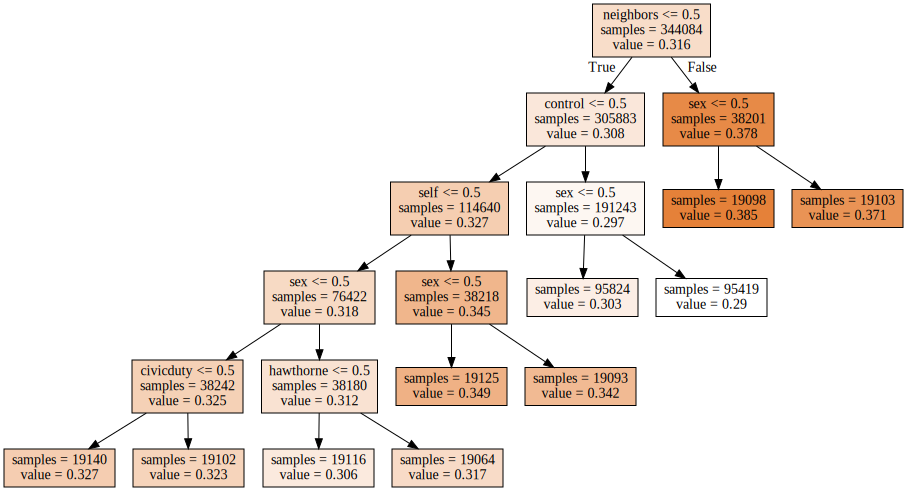

In [156]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [157]:
x1 = voting_df['control']

x1 = np.array(x1).reshape(-1, 1)

In [158]:
x1

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [159]:
y1 = voting_df['voting']
y1.shape

(344084,)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#X_train1, X_test1, y_train1, y_test1 = train_test_split(
 #x1, y1, random_state=42)
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x1, y1)
print("Accuracy on training set: {:.3f}".format(tree.score(x1, y1)))
#print("Accuracy on test set: {:.3f}".format(tree.score(X_test1, y_test1)))

Accuracy on training set: 0.002


In [161]:
d1 = ['control']
export_graphviz(tree, out_file="tree.dot", class_names=['voting'],
 feature_names=d1, impurity=False, filled=True)

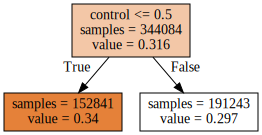

In [162]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [163]:
###In the "control" only tree, what is the absolute value of the difference in the predicted probability of voting between being in the control group versus being in a different group? You can use the absolute value function to get answer, i.e. abs(Control Prediction - Non-Control Prediction). Add the argument "digits = 6" to the prp command to get a more accurate estimate.
#is  0.043

In [164]:
x2 = voting_df[['sex', 'control']]
y2 = voting_df['voting']

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(x2, y2)
print("Accuracy on training set: {:.3f}".format(tree.score(x2, y2)))
#print("Accuracy on test set: {:.3f}".format(tree.score(X_test1, y_test1)))

Accuracy on training set: 0.002


In [166]:
d2 = ['sex', 'control']

export_graphviz(tree, out_file="tree.dot", class_names=['voting'], feature_names=d2, impurity=False, filled=True)

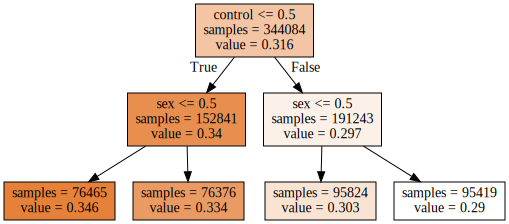

In [167]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### In the above decision tree, for the sex feature, left side is for male and right side is for female. By looking at the decision trees, In the control group men are more likely to vote.